In [6]:
import tensorflow as tf

In [30]:
dataset = tf.data.Dataset.load("dataset")

dataset = dataset.batch(10).prefetch(1)


In [ ]:
"0.4879807692307692 0.47115384615384615 0.042067307692307696 0.23798076923076922"

'0.4879807692307692 0.47115384615384615 0.042067307692307696 0.23798076923076922'

In [31]:
metrics = tf.keras.metrics.MeanIoU(num_classes=4)
early_stop = tf.keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,kernel_size=(3,3),strides=(1,1),padding="same",activation="relu",input_shape=(416,416,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128,kernel_size=(3,3),strides=(1,1),padding="same",activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(256,kernel_size=(3,3),strides=(1,1),padding="same",activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(256,kernel_size=(3,3),strides=(1,1),padding="same",activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(512,kernel_size=(3,3),strides=(1,1),padding="same",activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(4,kernel_size=(13,13),strides=(1,1),padding="valid")
])

lr = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=10000,
    decay_rate=0.9
)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr)


model.compile(optimizer=optimizer,loss="mean_squared_error",metrics=[metrics])

model.fit(dataset,epochs=200,callbacks=[early_stop])



Epoch 1/200


/home/lucas/Área de Trabalho/curso_tensorflow/venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 ━━━━━━━━━━━━━━━━━━━━ 31s 314ms/step - loss: 123.1340 - mean_io_u_7: 0.1039
Epoch 2/200


/home/lucas/Área de Trabalho/curso_tensorflow/venv/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_io_u_7
  current = self.get_monitor_value(logs)


89/89 ━━━━━━━━━━━━━━━━━━━━ 26s 293ms/step - loss: 32.5793 - mean_io_u_7: 0.1103
Epoch 3/200
89/89 ━━━━━━━━━━━━━━━━━━━━ 26s 293ms/step - loss: 57.8682 - mean_io_u_7: 0.1113
Epoch 4/200
89/89 ━━━━━━━━━━━━━━━━━━━━ 25s 283ms/step - loss: 79.9031 - mean_io_u_7: 0.1038
Epoch 5/200
89/89 ━━━━━━━━━━━━━━━━━━━━ 25s 283ms/step - loss: 101.2147 - mean_io_u_7: 0.1073
Epoch 6/200
89/89 ━━━━━━━━━━━━━━━━━━━━ 25s 283ms/step - loss: 57.9313 - mean_io_u_7: 0.0984
Epoch 7/200
89/89 ━━━━━━━━━━━━━━━━━━━━ 26s 287ms/step - loss: 82.3984 - mean_io_u_7: 0.1037
Epoch 8/200
89/89 ━━━━━━━━━━━━━━━━━━━━ 26s 291ms/step - loss: 59.4533 - mean_io_u_7: 0.1088
Epoch 9/200
89/89 ━━━━━━━━━━━━━━━━━━━━ 26s 294ms/step - loss: 64.6675 - mean_io_u_7: 0.1069
Epoch 10/200
89/89 ━━━━━━━━━━━━━━━━━━━━ 26s 296ms/step - loss: 56.9593 - mean_io_u_7: 0.1056
Epoch 11/200
89/89 ━━━━━━━━━━━━━━━━━━━━ 26s 295ms/step - loss: 55.7501 - mean_io_u_7: 0.1070
Epoch 12/200
89/89 ━━━━━━━━━━━━━━━━━━━━ 26s 293ms/step - loss: 53.1035 - mean_io_u_7: 0.1

In [32]:
model.save("model.h5")

In [1]:
import keras

model_load = keras.models.load_model("model.h5")



2025-04-28 11:54:00.721211: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-28 11:54:00.864194: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745852040.916652    4140 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745852040.930594    4140 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-28 11:54:01.070920: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


[[[[0.4966146  0.53909034 0.08474877 0.12167335]]]]


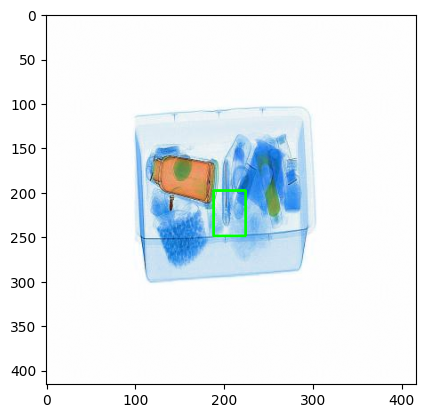

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("imagem_teste.jpg")
image = np.expand_dims(image,axis=0) / 255.0

predictions = model_load.predict(image)
print(predictions)

h_image,w_image= image.shape[1:3]

x,y,w,h = predictions[0][0][0]

x1 = int((x - w / 2)* w_image)
y1 = int((y - h / 2)* h_image)
x2 = int((x + w / 2)* w_image)
y2 = int((y + h / 2)* h_image)



cv2.rectangle(image[0], (x1, y1), (x2, y2), (0, 255, 0), 2)
plt.imshow(image[0])

In [15]:
image_teste = cv2.imread("imagem_teste.jpg")
image_teste = np.expand_dims(image_teste,axis=0) / 255.0
model_load.evaluate(image_teste,np.array([[[[0.4879807692307692 ,0.47115384615384615 ,0.042067307692307696 ,0.23798076923076922]]]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0050 - mean_io_u_7: 1.0000


[0.0050097620114684105, 0.9999998807907104]